In [2]:
import os
import pandas as pd
import pandapower.control as control
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapipes.timeseries import run_timeseries

In [3]:
from pandapipes import networks
net = networks.simple_gas_networks.gas_meshed_delta()

c:\Users\Schiendorfer\Anaconda3\envs\energy\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
c:\Users\Schiendorfer\Anaconda3\envs\energy\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=False, **self.d)
c:\Users\Schiendorfer\Anaconda3\envs\energy\Lib\site-packages\pandapower\io_utils.py:509: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(self.obj, precise_float=True, convert_axes=

In [4]:
net.ext_grid

,name,junction,p_bar,t_k,in_service,type
0,None,1,3.5,283.15,True,pt


In [5]:
net.sink

,name,junction,mdot_kg_per_s,scaling,in_service,type,stanet_nr
0,sink_node_sink1,2,0.000233,1.0,True,sink,3.0


In [6]:
net.source

,name,junction,mdot_kg_per_s,scaling,in_service,type,stanet_nr
0,sink_node_source1,0,0.000233,1.0,True,source,1.0


In [7]:
profiles_sink = pd.read_csv(os.path.join('files',
                                         'simple_time_series_example_sink_profiles.csv'),
                                         index_col=0)
profiles_source = pd.read_csv(os.path.join('files',
                                           'simple_time_series_example_source_profiles.csv'),
                                           index_col=0)
ds_sink = DFData(profiles_sink)
ds_source = DFData(profiles_source)

const_sink = control.ConstControl(net, element='sink', variable='mdot_kg_per_s',
                                  element_index=net.sink.index.values, data_source=ds_sink,
                                  profile_name=net.sink.index.values.astype(str))
const_source = control.ConstControl(net, element='source', variable='mdot_kg_per_s',
                                    element_index=net.source.index.values,
                                    data_source=ds_source,
                                    profile_name=net.source.index.values.astype(str))

In [23]:
net.source.index.values.astype(str)

array(['0'], dtype='<U21')

In [17]:
profiles_source

,0
0,0.005
1,0.010
2,0.015
3,0.020
4,0.025
5,0.030
6,0.035
7,0.040
8,0.045
9,0.050


In [8]:
profiles_source

,0
0,0.005
1,0.010
2,0.015
3,0.020
4,0.025
5,0.030
6,0.035
7,0.040
8,0.045
9,0.050


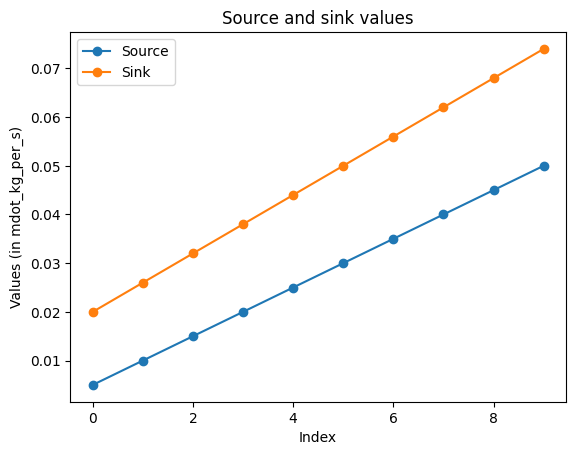

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the series
plt.plot(profiles_source.index, profiles_source.values, marker="o", linestyle="-", label="Source")
plt.plot(profiles_sink.index, profiles_sink.values, marker="o", linestyle="-", label="Sink")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Values (in mdot_kg_per_s)")
plt.title("Source and sink values")
plt.legend()

# Show the plot
plt.show()

It looks like the out flow to the sink is greater than the in flow to the source.
* -> Here, inflow is given as mass per time / kg per sec (Where did we find the assumption that we can convert volumetric flow of gas to mass - must assume constant density or smthing)

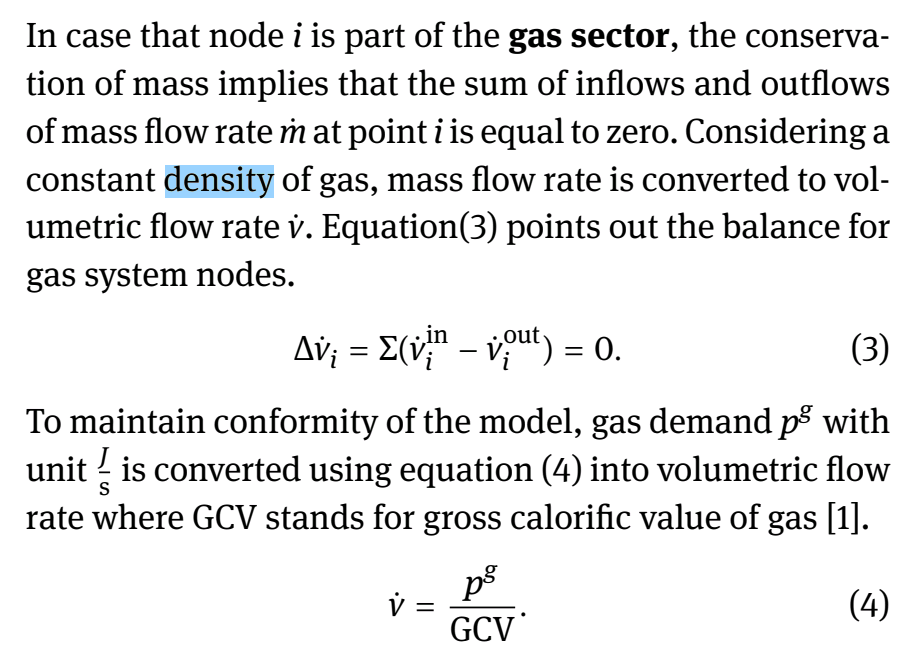

* And since that is the case - we might see a pressure drop over time in the pressure at the sink node? 

In [10]:
time_steps = range(10)

In [11]:
log_variables = [('res_junction', 'p_bar'), ('res_pipe', 'v_mean_m_per_s'),
                 ('res_pipe', 'reynolds'), ('res_pipe', 'lambda'),
                 ('res_sink', 'mdot_kg_per_s'), ('res_source', 'mdot_kg_per_s'),
                 ('res_ext_grid', 'mdot_kg_per_s')]
ow = OutputWriter(net, time_steps, output_path=None, log_variables=log_variables)

In [12]:
run_timeseries(net, time_steps)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 85.41it/s]


In [13]:
print("pressure:")
print(ow.np_results["res_junction.p_bar"])
print("mean velocity:")
print(ow.np_results["res_pipe.v_mean_m_per_s"])
print("reynolds number:")
print(ow.np_results["res_pipe.reynolds"])
print("lambda:")
print(ow.np_results["res_pipe.lambda"])
print("mass flow sink:")
print(ow.np_results["res_sink.mdot_kg_per_s"])
print("mass flow source:")
print(ow.np_results["res_source.mdot_kg_per_s"])
print("mass flow ext. grid:")
print(ow.np_results["res_ext_grid.mdot_kg_per_s"])

pressure:
[[3.49975257 3.5        3.49961173]
 [3.49973649 3.5        3.49949785]
 [3.49972162 3.5        3.49936071]
 [3.49970758 3.5        3.49920016]
 [3.49969414 3.5        3.4990161 ]
 [3.49968112 3.5        3.49880846]
 [3.49966839 3.5        3.49857714]
 [3.49965585 3.5        3.4983221 ]
 [3.49964345 3.5        3.49804329]
 [3.49963112 3.5        3.49774068]]
mean velocity:
[[-0.57651001 -0.49611582 -0.21696278]
 [-0.76534799 -0.51363216 -0.25383547]
 [-0.95276066 -0.5293793  -0.2932576 ]
 [-1.13916058 -0.54386481 -0.33449866]
 [-1.32480882 -0.55740925 -0.37709744]
 [-1.5099034  -0.57025531 -0.42070489]
 [-1.69457795 -0.58256615 -0.46508642]
 [-1.87893324 -0.59446437 -0.51006588]
 [-2.06302946 -0.60602249 -0.55553927]
 [-2.24692628 -0.61731234 -0.60140351]]
reynolds number:
[[17616.5119901  13644.68760409  4971.54746076]
 [23386.16464558 14126.19816972  5816.74628772]
 [29112.0762463  14559.10756339  6720.26652103]
 [34807.40751353 14958.03880873  7664.56053232]
 [40478.688166

In [14]:
net.junction

,name,pn_bar,tfluid_k,height_m,in_service,type,stanet_nr,p_stanet,K_stanet,stanet_id
0,source1,3.5,283.15,0.0,True,junction,1.0,3.5,0.99007,source1
1,ext1,3.5,283.15,0.0,True,junction,2.0,3.5,0.99007,ext1
2,sink1,3.5,283.15,0.0,True,junction,3.0,3.5,0.99007,sink1


In [15]:
ow.np_results["res_junction.p_bar"]

array([[3.49975257, 3.5       , 3.49961173],
       [3.49973649, 3.5       , 3.49949785],
       [3.49972162, 3.5       , 3.49936071],
       [3.49970758, 3.5       , 3.49920016],
       [3.49969414, 3.5       , 3.4990161 ],
       [3.49968112, 3.5       , 3.49880846],
       [3.49966839, 3.5       , 3.49857714],
       [3.49965585, 3.5       , 3.4983221 ],
       [3.49964345, 3.5       , 3.49804329],
       [3.49963112, 3.5       , 3.49774068]])

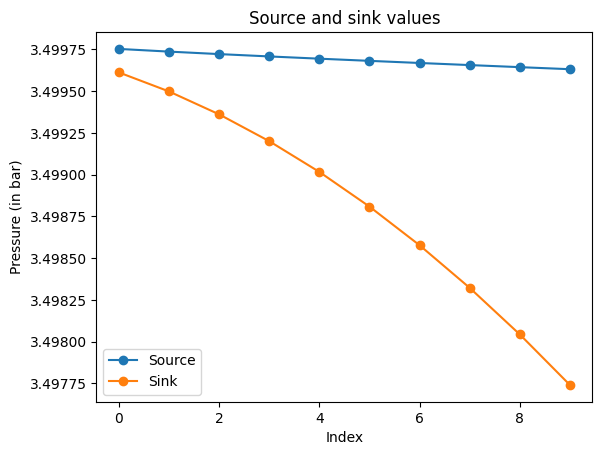

In [16]:
# Plot the series
source_pressure = ow.np_results["res_junction.p_bar"][:, 0]
sink_pressure = ow.np_results["res_junction.p_bar"][:, 2]

plt.plot(time_steps, source_pressure, marker="o", linestyle="-", label="Source")
plt.plot(time_steps, sink_pressure, marker="o", linestyle="-", label="Sink")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Pressure (in bar)")
plt.title("Source and sink values")
plt.legend()

# Show the plot
plt.show()